# Lake model continued - subspace partitioning

In the previous week you used the lake problem as a means of getting acquainted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of the [open exploration tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## 1. Apply scenario discovery

1. Instanciate the model and define its parameters. Use the same parameters as in Assignment 2.
2. Generate 10 policies and 1000 scenarios and evaluate them.
3. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop_columns`*
4. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from lakemodel_function import lake_problem
from ema_workbench import Model, RealParameter, ScalarOutcome

# Instantiate the model
model = Model('lakemodel', function=lake_problem)

# Specify uncertainties
model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                       RealParameter('stdev', 0.001, 0.005),
                       RealParameter('b', 0.1, 0.45),
                       RealParameter('q', 2, 4.5),
                       RealParameter('delta', 0.93, 0.99)]

# Set levers, one for each time step
model.levers = [RealParameter(f'l{i}', 0, 0.1) for i in range(100)]

# Specify outcomes
model.outcomes = [ScalarOutcome('max_P'),
                  ScalarOutcome('utility'),
                  ScalarOutcome('inertia'),
                  ScalarOutcome('reliability')]

In [3]:
from ema_workbench import MultiprocessingEvaluator, ema_logging, perform_experiments

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=1000, policies=4)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 1000 scenarios * 4 policies * 1 model(s) = 4000 experiments
100%|█████████████████████████████████████| 4000/4000 [00:05<00:00, 701.19it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [4]:
experiments, outcomes = results

In [5]:
experiments

,b,delta,mean,q,stdev,l0,l1,l10,l11,l12,...,l93,l94,l95,l96,l97,l98,l99,scenario,policy,model
0,0.193026,0.971216,0.038583,3.655054,0.004920,0.081618,0.010679,0.032587,0.020275,0.088805,...,0.078810,0.095402,0.021688,0.013650,0.021591,0.027887,0.067581,1008,1004,lakemodel
1,0.304997,0.962137,0.046869,3.110301,0.001420,0.081618,0.010679,0.032587,0.020275,0.088805,...,0.078810,0.095402,0.021688,0.013650,0.021591,0.027887,0.067581,1009,1004,lakemodel
2,0.388363,0.936585,0.026509,3.288002,0.004182,0.081618,0.010679,0.032587,0.020275,0.088805,...,0.078810,0.095402,0.021688,0.013650,0.021591,0.027887,0.067581,1010,1004,lakemodel
3,0.312355,0.939917,0.010747,2.997924,0.003654,0.081618,0.010679,0.032587,0.020275,0.088805,...,0.078810,0.095402,0.021688,0.013650,0.021591,0.027887,0.067581,1011,1004,lakemodel
4,0.433791,0.944476,0.034675,3.303473,0.003824,0.081618,0.010679,0.032587,0.020275,0.088805,...,0.078810,0.095402,0.021688,0.013650,0.021591,0.027887,0.067581,1012,1004,lakemodel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.250869,0.975376,0.041012,3.997367,0.003941,0.040739,0.043326,0.093235,0.098811,0.025070,...,0.023406,0.057677,0.047738,0.086222,0.069532,0.018989,0.046887,2003,1007,lakemodel
3996,0.276717,0.945261,0.024381,4.071453,0.001211,0.040739,0.043326,0.093235,0.098811,0.025070,...,0.023406,0.057677,0.047738,0.086222,0.069532,0.018989,0.046887,2004,1007,lakemodel
3997,0.128695,0.955680,0.028051,4.327636,0.002376,0.040739,0.043326,0.093235,0.098811,0.025070,...,0.023406,0.057677,0.047738,0.086222,0.069532,0.018989,0.046887,2005,1007,lakemodel
3998,0.384180,0.943651,0.043390,2.604424,0.003172,0.040739,0.043326,0.093235,0.098811,0.025070,...,0.023406,0.057677,0.047738,0.086222,0.069532,0.018989,0.046887,2006,1007,lakemodel


In [7]:
cleaned_experiments = experiments.drop(labels=[l.name for l in model.levers], axis=1)
cleaned_experiments

,b,delta,mean,q,stdev,scenario,policy,model
0,0.193026,0.971216,0.038583,3.655054,0.004920,1008,1004,lakemodel
1,0.304997,0.962137,0.046869,3.110301,0.001420,1009,1004,lakemodel
2,0.388363,0.936585,0.026509,3.288002,0.004182,1010,1004,lakemodel
3,0.312355,0.939917,0.010747,2.997924,0.003654,1011,1004,lakemodel
4,0.433791,0.944476,0.034675,3.303473,0.003824,1012,1004,lakemodel
...,...,...,...,...,...,...,...,...
3995,0.250869,0.975376,0.041012,3.997367,0.003941,2003,1007,lakemodel
3996,0.276717,0.945261,0.024381,4.071453,0.001211,2004,1007,lakemodel
3997,0.128695,0.955680,0.028051,4.327636,0.002376,2005,1007,lakemodel
3998,0.384180,0.943651,0.043390,2.604424,0.003172,2006,1007,lakemodel


In [10]:
from ema_workbench.analysis import prim

data = outcomes['reliability']

y = data < np.percentile(data, 10)

prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 4000 points remaining, containing 330 cases of interest
[MainProcess/INFO] mean: 0.8708333333333333, mass: 0.06, coverage: 0.6333333333333333, density: 0.8708333333333333 restricted_dimensions: 5


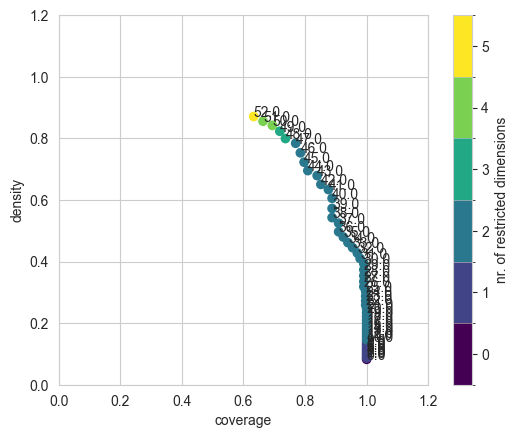

In [17]:
box1.show_tradeoff(annotated=True)
plt.show()

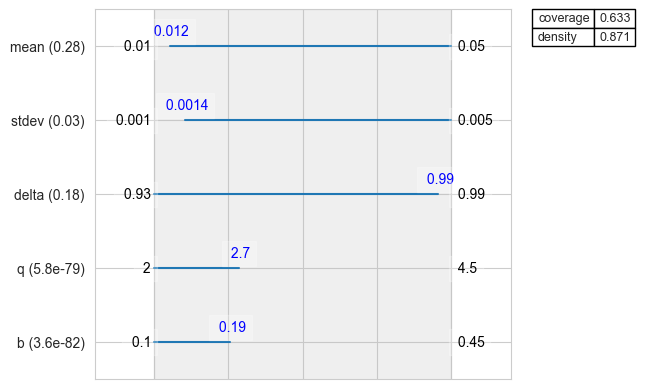

In [23]:
point = 52
box1.inspect(point, style='graph')
plt.show(box1)

## 2. Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

[MainProcess/INFO] model dropped from analysis because only a single category
C:\Users\julia\PycharmProjects\EPA141A-Model-based-decision-making\.venv\Lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


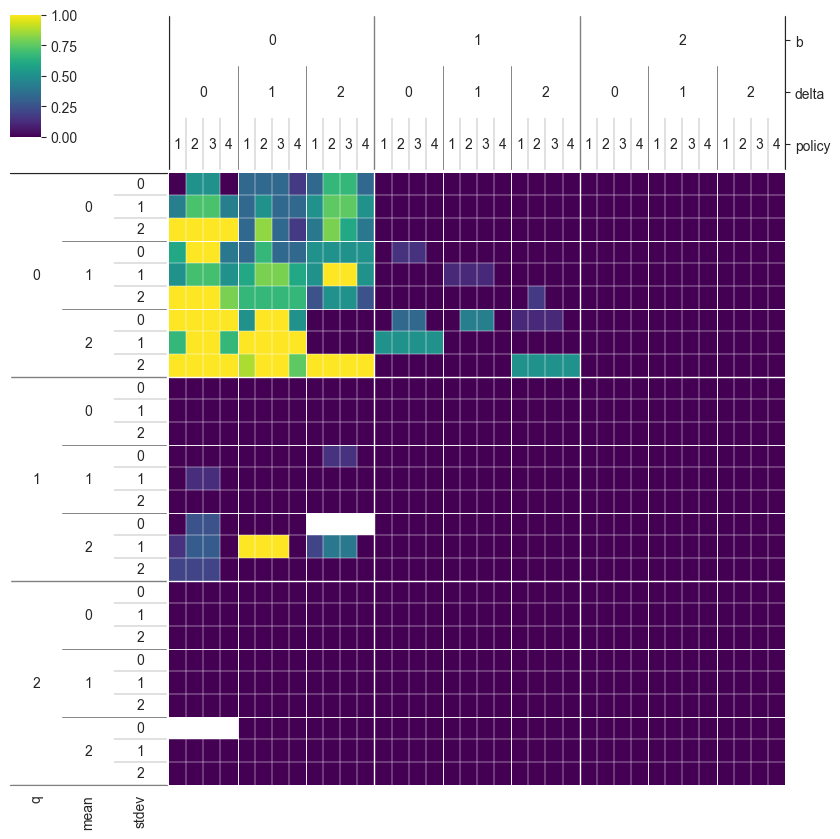

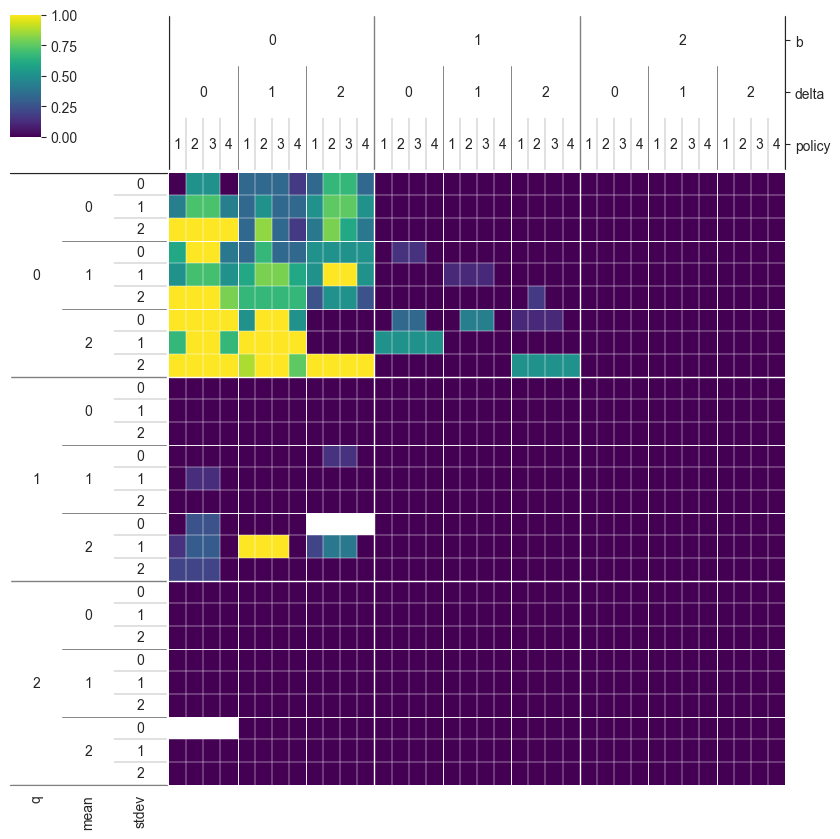

In [24]:
from ema_workbench.analysis import dimensional_stacking

dimensional_stacking.create_pivot_plot(cleaned_experiments, y)